# **Team Details**

In [43]:
"""
TEAM Number : 36
TEAM Members :
1. Dharmick R
2. Krithik Keshav C
3. Aadhithyan Velan M
4. Atul Kumar
"""

'\nTEAM Number : 36\nTEAM Members :\n1. Dharmick R\n2. Krithik Keshav C\n3. Aadhithyan Velan M\n4. Atul Kumar\n'

# **Intalling Dependencies**

In [44]:
# Necessary dependencies
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **Importing Libraries**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Understanding and Preprocessing**


1. Load and inspect the dataset structure (size, variables, data types).
2. Identify numerical and categorical features.
3. Define a dependent feature as the regression target.
4. Justify the selection of numerical input features.






In [69]:
# Loaded dataset
df = pd.read_csv('Dataset.csv')

# Shape and info
df.shape
df.info()

# Missing values
df.isnull().sum()

df.head()


<class 'pandas.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Crop_Type            40000 non-null  str    
 1   Fertilizer_Type      40000 non-null  str    
 2   Nitrogen_kg_ha       40000 non-null  float64
 3   Irrigation_Method    40000 non-null  str    
 4   Irrigation_Water_mm  40000 non-null  float64
 5   Avg_Temperature_C    40000 non-null  float64
 6   Rainfall_mm          40000 non-null  float64
 7   Humidity_%           40000 non-null  float64
 8   CO2_kg_ha            40000 non-null  float64
 9   CH4_kg_ha            40000 non-null  float64
 10  N2O_kg_ha            40000 non-null  float64
 11  Total_GHG_kgCO2e     40000 non-null  float64
 12  Scenario_Type        40000 non-null  str    
 13  Intervention_Type    30000 non-null  str    
dtypes: float64(9), str(5)
memory usage: 4.3 MB


,Crop_Type,Fertilizer_Type,Nitrogen_kg_ha,Irrigation_Method,Irrigation_Water_mm,Avg_Temperature_C,Rainfall_mm,Humidity_%,CO2_kg_ha,CH4_kg_ha,N2O_kg_ha,Total_GHG_kgCO2e,Scenario_Type,Intervention_Type
0,Soybean,Synthetic,232.998485,Sprinkler,798.658484,13.900466,487.193424,42.904181,660.659923,3.832290,2.935502,1631.246917,Baseline,NaN
1,Soybean,Synthetic,141.237938,Sprinkler,713.986285,15.732909,487.193424,42.904181,588.493009,2.439946,1.520592,1102.628022,Counterfactual,Reduced_Input
2,Soybean,Synthetic,161.065486,Sprinkler,642.881174,15.332411,487.193424,42.904181,528.132205,2.406290,2.177719,1237.249832,Counterfactual,Reduced_Input
3,Soybean,Synthetic,160.219869,Sprinkler,617.580538,15.356536,487.193424,42.904181,514.285435,2.693513,1.733796,1098.294460,Counterfactual,Reduced_Input
4,Rice,Mixed,201.886213,Flood,370.524124,11.626290,1438.662645,88.281602,315.108046,15.000000,2.122508,1322.615320,Baseline,NaN


## Target Feature
Total_GHG_kgCO2e

## Input Features
1. Crop_Type
2. Fertilizer_Type
3. Irrigation_Water_mm
4. Nitrogen_kg_ha
5. Avg_Temperature_C
6. Rainfall_mm
7. Humidity_%

We use these input features because they directly control the biological and chemical processes that create greenhouse gas emissions on a farm. 
*Nitrogen* fertilizer is the primary source that is converted into nitrous oxide.
Water inputs from *Irrigation* and *Rainfall* determine whether the soil produces CO2 (dry, oxygen-rich) or CH4 (wet, oxygen-poor).
*Temperature* and *Humidity* act as catalysts for the microbial decay rate, higher temperature and humidity means these microbes break down chemicals to release greenhouse gases into the atmosphere.

# **Exploratory Data Analysis (EDA)**
1. Compute descriptive statistics for numerical variables.
2. Visualize feature distributions using histograms and boxplots.
3. Analyze relationships between inputs and the target using scatter plots.
4. Compute and visualize a correlation matrix.
5. Include additional plots wherever useful.
6. Summarize the key observations and report at least three data-driven insights.

### 2.1 Computing Descriptive Statistics

In [70]:
# Computing descriptive statistics
stats_summary = df.describe()
print(stats_summary)

       Nitrogen_kg_ha  Irrigation_Water_mm  Avg_Temperature_C   Rainfall_mm  \
count    40000.000000         40000.000000       40000.000000  40000.000000   
mean       142.765778           593.846482          23.444599    896.385823   
std         63.900585           255.983963           7.154821    346.103652   
min         30.613614           140.869913          10.002934    300.063392   
25%         89.472766           377.689330          17.350469    593.812110   
50%        139.421300           585.129210          23.287816    900.339261   
75%        189.122386           794.016279          29.524868   1192.976798   
max        299.971299          1199.878798          36.949406   1499.774383   

         Humidity_%     CO2_kg_ha     CH4_kg_ha     N2O_kg_ha  \
count  40000.000000  40000.000000  40000.000000  40000.000000   
mean      65.242157    503.228100      2.795829      1.712855   
std       14.428698    204.944971      2.287686      0.848229   
min       40.006735    130.7

### 2.2 Visualizing Feature Distributions

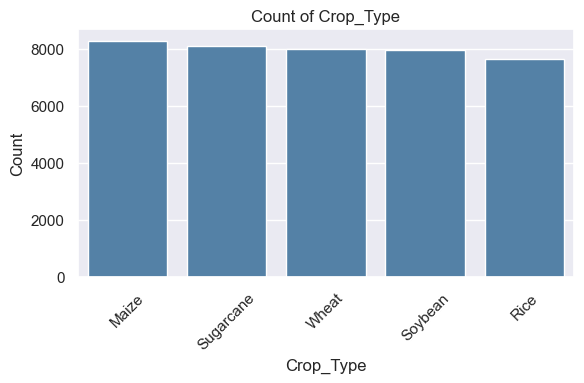

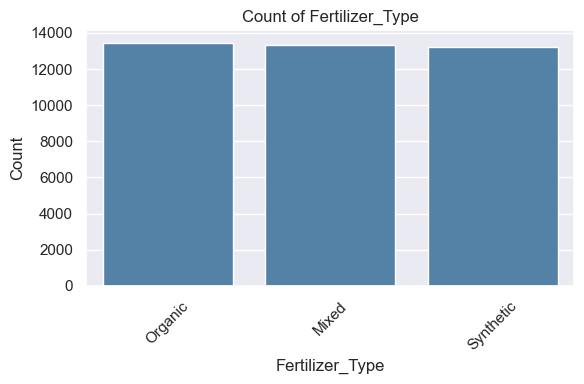

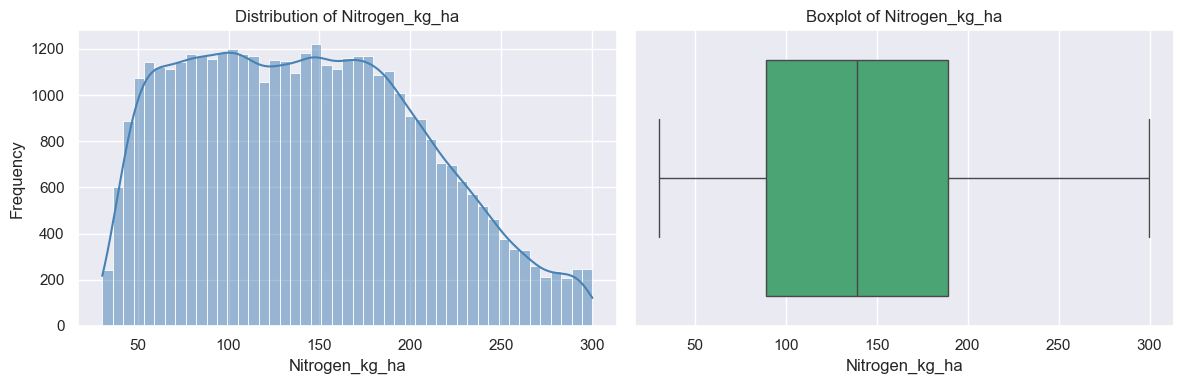

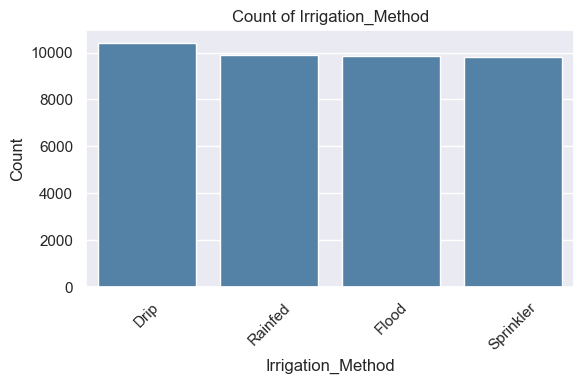

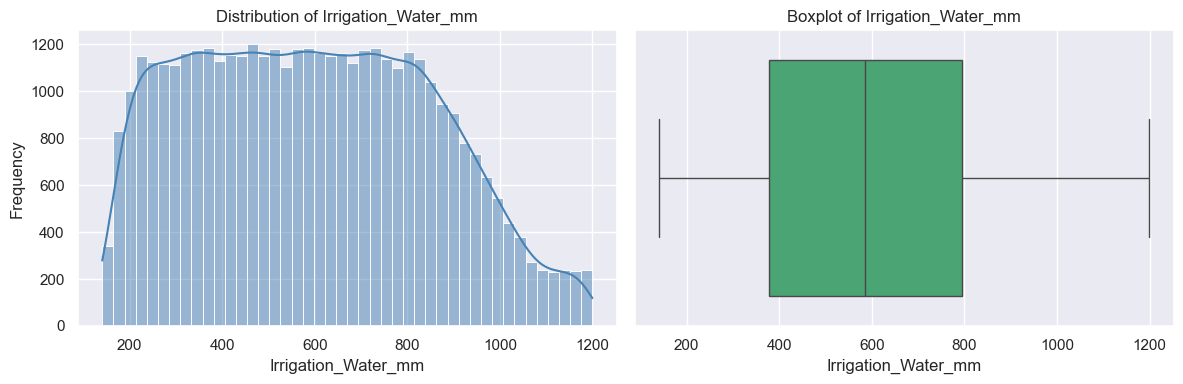

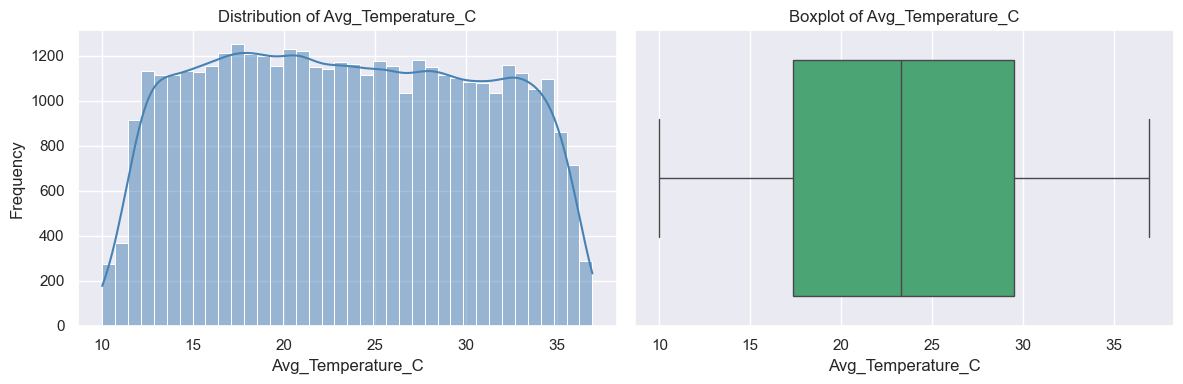

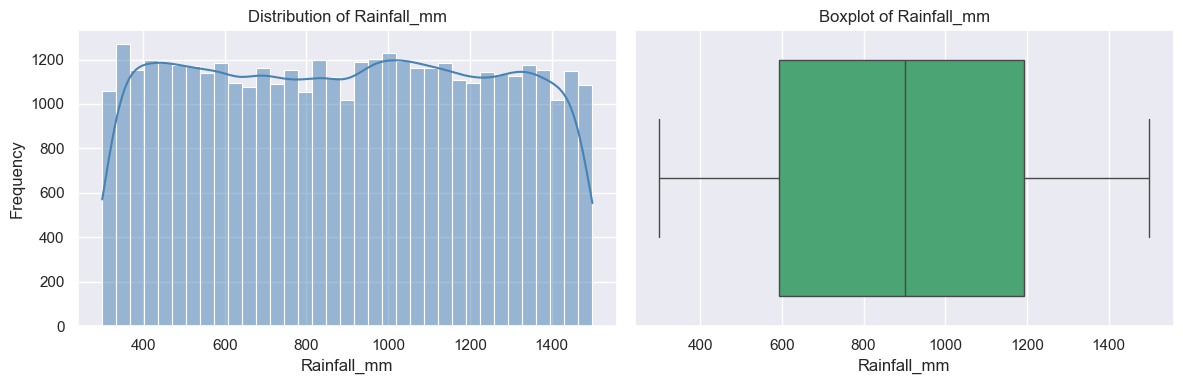

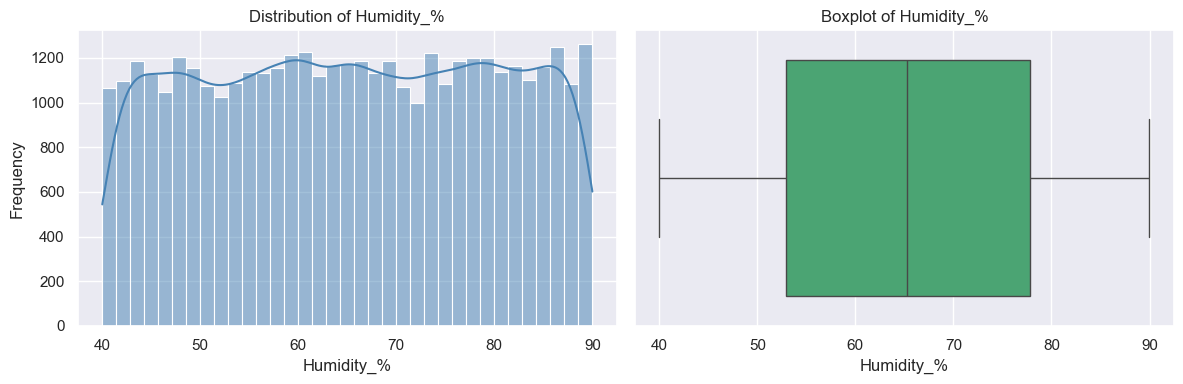

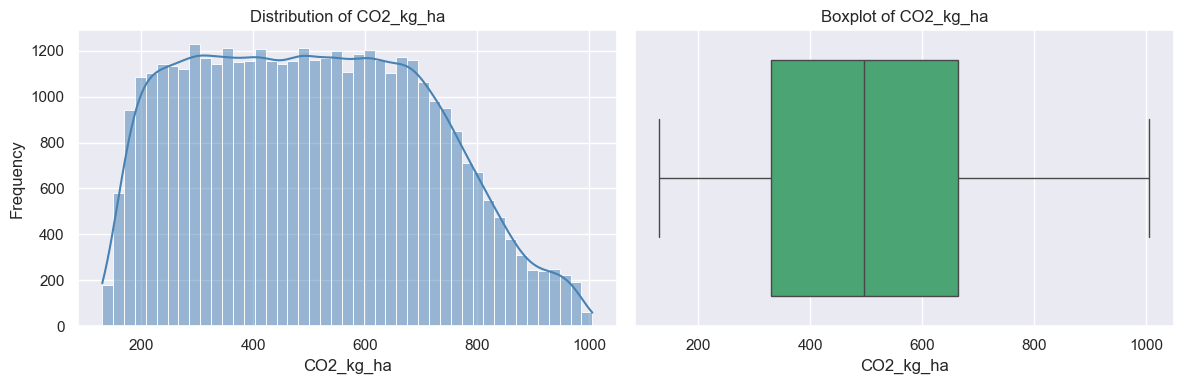

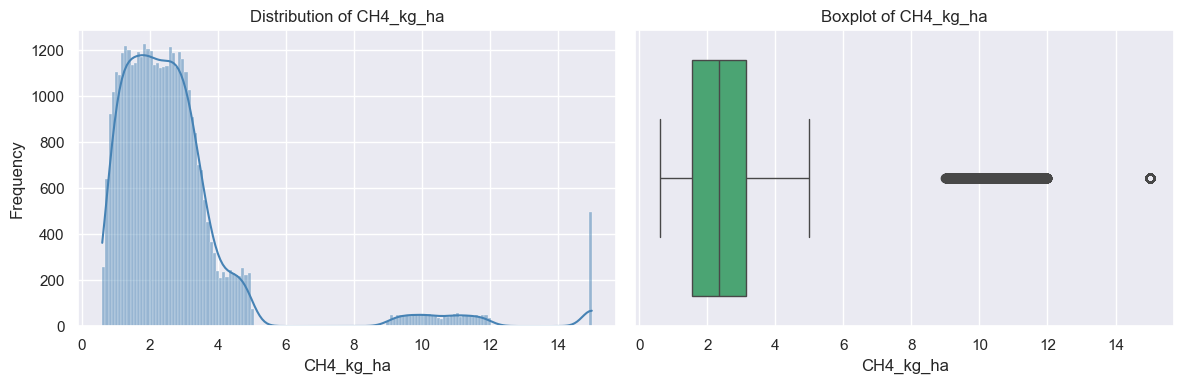

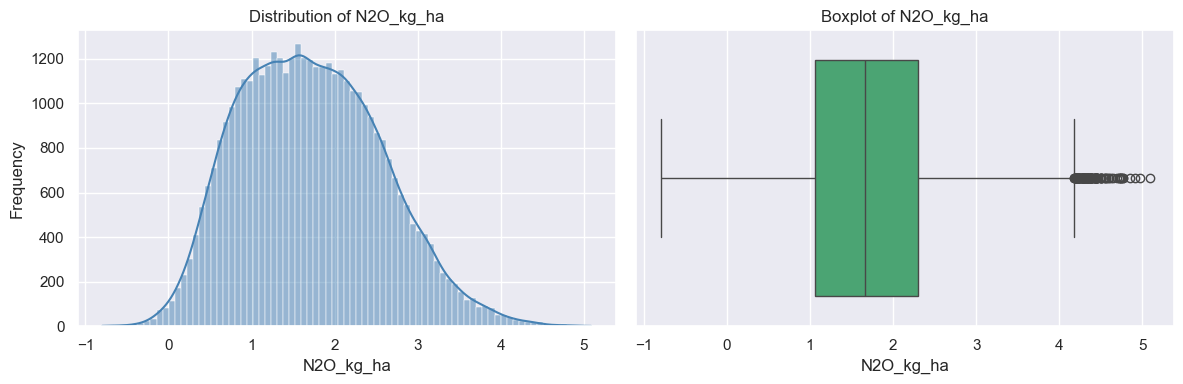

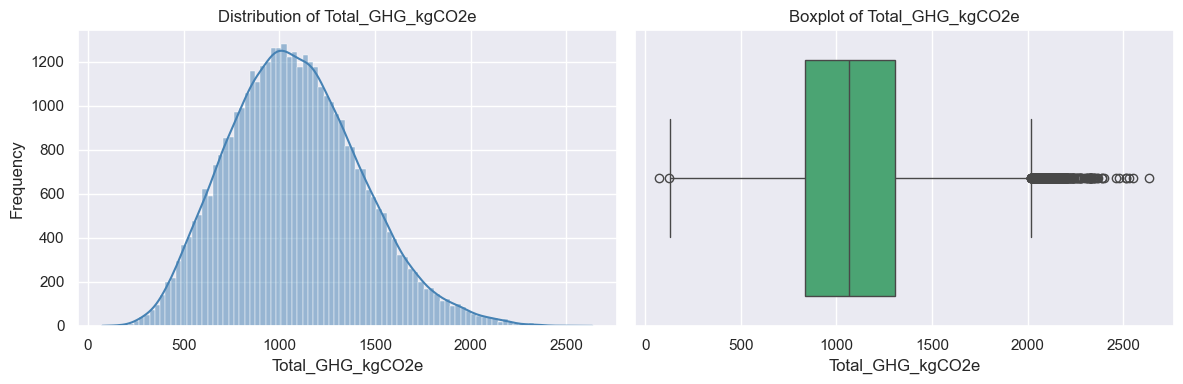

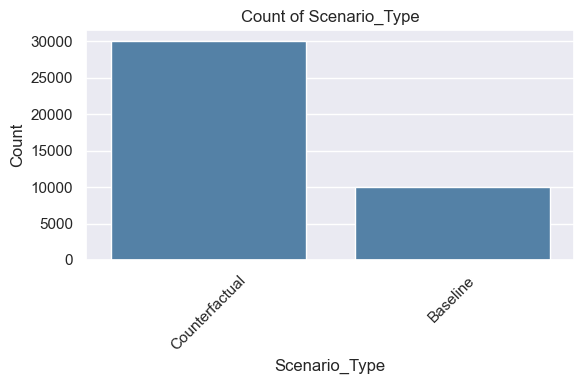

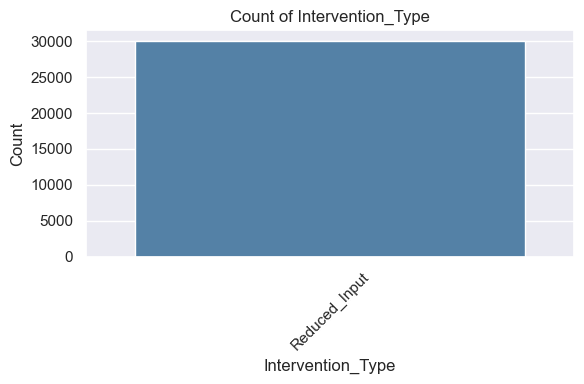

In [71]:
sns.set_theme(style='darkgrid')

for col in df.columns:

    if df[col].dtype == 'str':
        plt.figure(figsize=(6,4))

        counts = df[col].value_counts()

        sns.barplot(x=counts.index, y=counts.values, color='steelblue')

        plt.title(f"Count of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

    else:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        sns.histplot(df[col], kde=True, ax=axes[0], color='steelblue')
        axes[0].set_title(f"Distribution of {col}")
        axes[0].set_ylabel("Frequency")

        sns.boxplot(x=df[col], ax=axes[1], color='mediumseagreen')
        axes[1].set_title(f"Boxplot of {col}")

        plt.tight_layout()
        plt.show()

### 2.3 Scatter plots

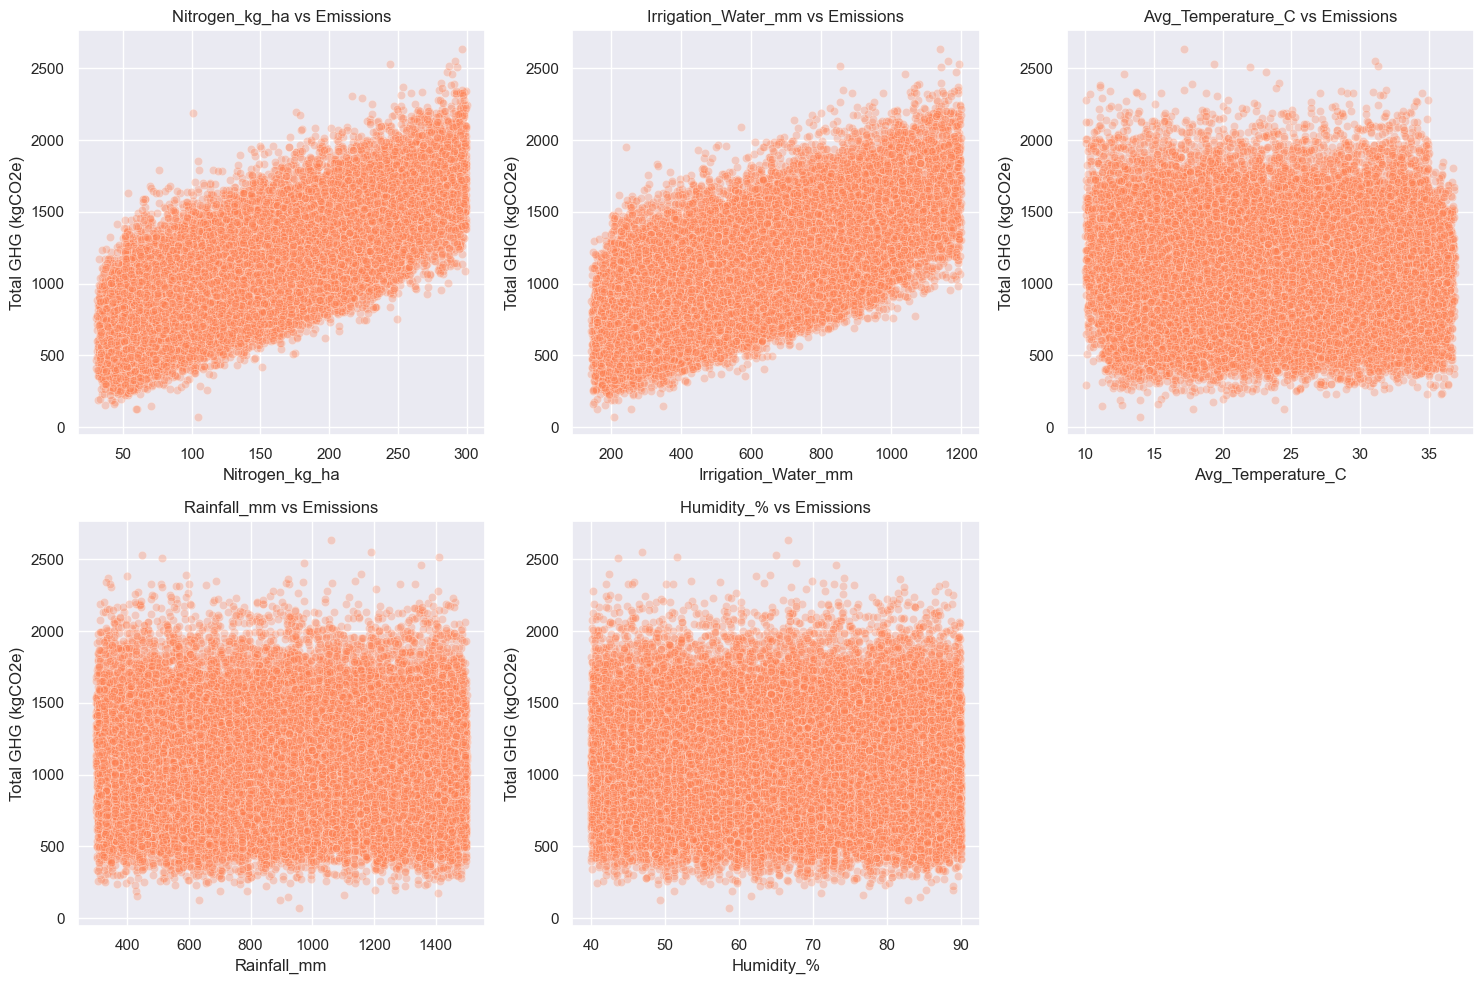

In [72]:
input_features = ['Nitrogen_kg_ha', 'Irrigation_Water_mm', 'Avg_Temperature_C', 'Rainfall_mm', 'Humidity_%']
target_feature = 'Total_GHG_kgCO2e'

plt.figure(figsize=(15, 10))

for i, col in enumerate(input_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[col], y=df[target_feature], alpha=0.3, color='coral')
    plt.title(f"{col} vs Emissions")
    plt.xlabel(col)
    plt.ylabel("Total GHG (kgCO2e)")

plt.tight_layout()
plt.show()

### 2.4 Correlation matrix

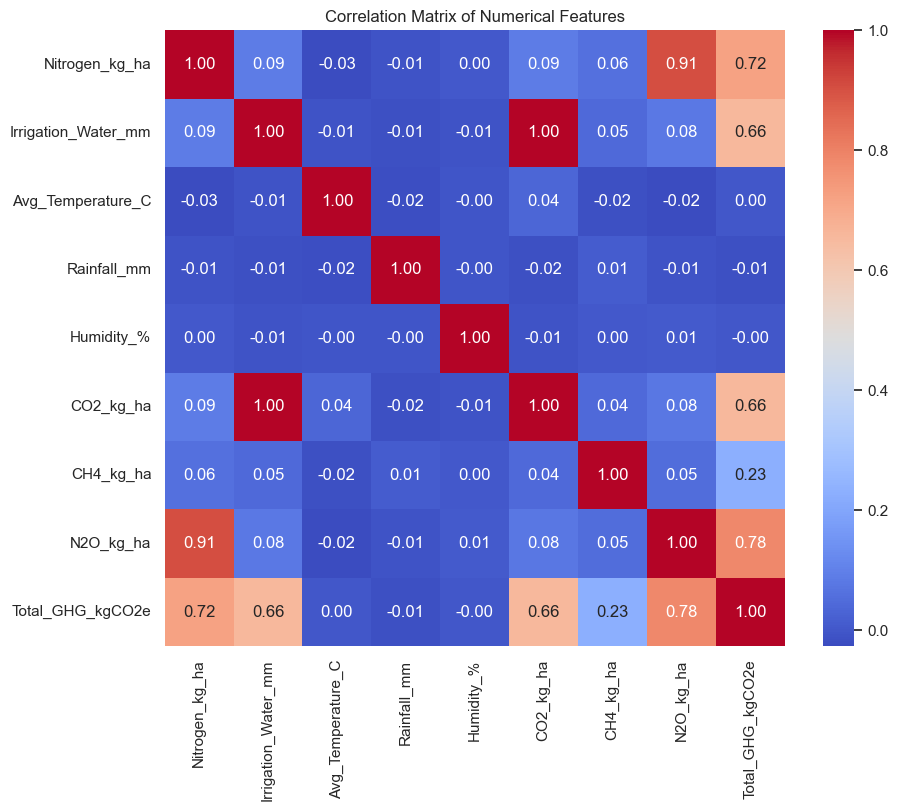

In [73]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# **Linear Regression**

1. Formulate emission prediction as a regression problem.
2. Implement Linear Regression using:
    * Batch Gradient Descent
    * Stochastic Gradient Descent
3. Split data into training and testing sets.
4. Evaluate models using MAE, MSE, and R².
5. Compare optimization behavior and results using metrics and plots.
6. Visualize the results


### Generating Train and Test Data

In [74]:
input_features = ['Nitrogen_kg_ha', 'Irrigation_Water_mm', 'Avg_Temperature_C', 'Rainfall_mm', 'Humidity_%']
target_feature = 'Total_GHG_kgCO2e'

# Select input features (X) and target feature (y)
X = df[input_features]
y = df[target_feature]

# Shuffle the DataFrame randomly
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Re-extract X and y from the shuffled DataFrame to maintain order
X_shuffled = df_shuffled[input_features]
y_shuffled = df_shuffled[target_feature]

# Calculate the split point for an 80:20 train-test split
split_point = int(len(df_shuffled) * 0.8)

# Manually divide the X and y data into training and testing sets
X_train = X_shuffled.iloc[:split_point]
y_train = y_shuffled.iloc[:split_point]
X_test = X_shuffled.iloc[split_point:]
y_test = y_shuffled.iloc[split_point:]

# Calculate mean and standard deviation for each feature in X_train
X_train_mean = X_train.mean()
X_train_std = X_train.std()

# Standardize both X_train and X_test
X_train_scaled = ((X_train - X_train_mean) / X_train_std).values
X_test_scaled = ((X_test - X_train_mean) / X_train_std).values

## Eval Metrics

In [75]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [76]:
def cost_function(X, y_true, weights, bias):
    n_samples = X.shape[0]
    y_predicted = np.dot(X, weights) + bias
    cost = (1 / (2 * n_samples)) * np.sum((y_predicted - y_true)**2)
    return cost

### Batch Gradient Descent

In [77]:
learning_rate=0.01
n_iterations=1000
n_samples, n_features = X_train_scaled.shape
weights = np.zeros(n_features)
bias = 0
costs = []

y_train_np = y_train.values if isinstance(y_train, pd.Series) else y_train
if y_train_np.ndim > 1:
    y_train_np = y_train_np.flatten()

for _ in range(n_iterations):
    # Make predictions
    y_predicted = np.dot(X_train_scaled, weights) + bias # y_predicted will be 1D

    # Calculate gradients
    # (y_predicted - y_np) will be a 1D array of shape (n_samples,)
    dw = (1 / n_samples) * np.dot(X_train_scaled.T, (y_predicted - y_train_np))
    db = (1 / n_samples) * np.sum(y_predicted - y_train_np)

    # Update weights and bias
    weights -= learning_rate * dw
    bias -= learning_rate * db

    # Calculate and store cost
    cost = cost_function(X_train_scaled, y_train_np, weights, bias)
    costs.append(cost)

batch_gd_weights = weights # Store weights after BGD training
batch_gd_costs = costs
y_pred_batch_gd = np.dot(X_test_scaled, weights) + bias
mae_batch_gd = mae(y_test, y_pred_batch_gd)
mse_batch_gd = mse(y_test, y_pred_batch_gd)
r2_batch_gd = r2_score(y_test, y_pred_batch_gd)
print(f"MAE (Batch GD): {mae_batch_gd:.2f}")
print(f"MSE (Batch GD): {mse_batch_gd:.2f}")
print(f"R2 Score (Batch GD): {r2_batch_gd:.2f}")

MAE (Batch GD): 92.85
MSE (Batch GD): 14663.79
R2 Score (Batch GD): 0.88


### Stochastic Gradient Descent

In [78]:
learning_rate=0.01
n_iterations=20
n_samples, n_features = X_train_scaled.shape
weights = np.zeros(n_features)
bias = 0
costs = []
y_train_np = y_train.values if isinstance(y_train, pd.Series) else y_train
if y_train_np.ndim > 1:
    y_train_np = y_train_np.flatten()
for _ in range(n_iterations):
    # Iterate over each sample for SGD
    for i in range(n_samples):
        # Select a random sample
        random_index = np.random.randint(0, n_samples)
        xi = X_train_scaled[random_index:random_index+1]
        yi = y_train_np[random_index:random_index+1]

        # Make prediction for the single sample
        y_predicted = np.dot(xi, weights) + bias

        # Calculate gradients for the single sample
        dw = (2 * xi.T.dot(y_predicted - yi))
        db = (2 * (y_predicted - yi))

        # Update weights and bias
        weights -= learning_rate * dw.flatten()
        bias -= learning_rate * db.flatten()

    # Calculate and store cost after each epoch (full pass through data)
    cost = cost_function(X_train_scaled, y_train_np, weights, bias)
    costs.append(cost)

sgd_weights = weights # Store weights after SGD training
sgd_costs = costs
y_pred_sgd = np.dot(X_test_scaled, weights) + bias
mae_sgd = mae(y_test, y_pred_sgd)
mse_sgd = mse(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)
print(f"MAE (SGD): {mae_sgd:.2f}")
print(f"MSE (SGD): {mse_sgd:.2f}")
print(f"R2 Score (SGD): {r2_sgd:.2f}")

MAE (SGD): 96.01
MSE (SGD): 15908.25
R2 Score (SGD): 0.87


### Visualization

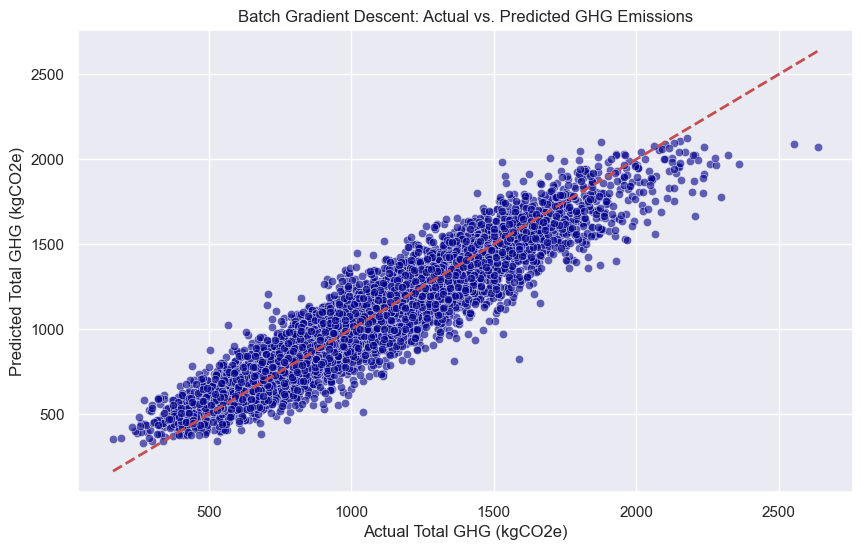

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_batch_gd, alpha=0.6, color='darkblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Total GHG (kgCO2e)')
plt.ylabel('Predicted Total GHG (kgCO2e)')
plt.title('Batch Gradient Descent: Actual vs. Predicted GHG Emissions')
plt.grid(True)
plt.show()

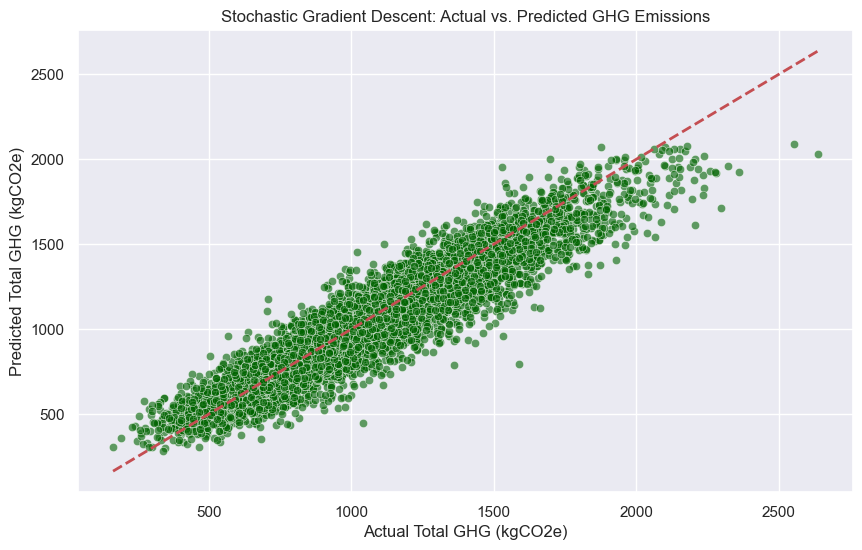

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_sgd, alpha=0.6, color='darkgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Total GHG (kgCO2e)')
plt.ylabel('Predicted Total GHG (kgCO2e)')
plt.title('Stochastic Gradient Descent: Actual vs. Predicted GHG Emissions')
plt.grid(True)
plt.show()

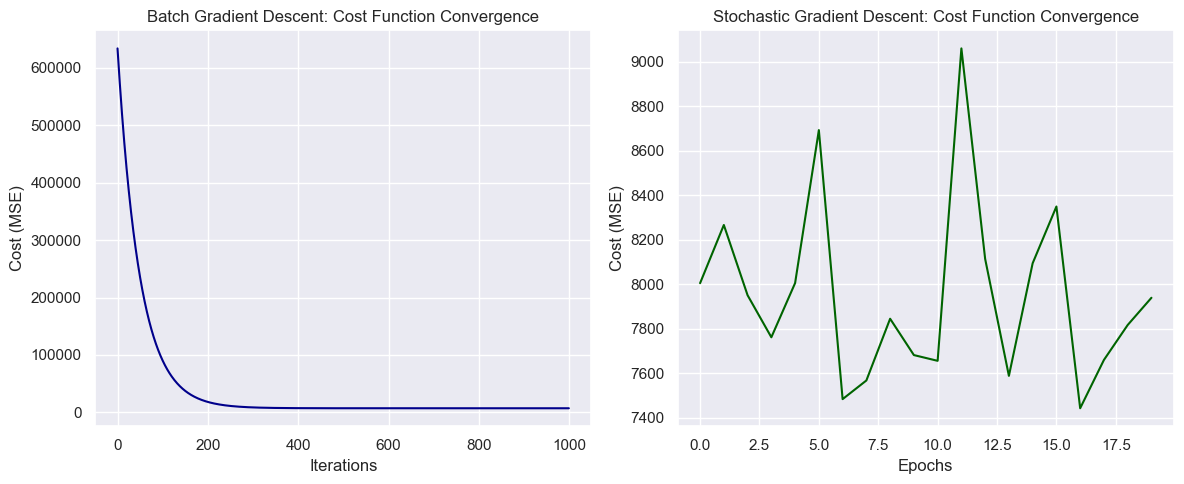

In [81]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(len(batch_gd_costs)), batch_gd_costs, color='darkblue')
plt.title('Batch Gradient Descent: Cost Function Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(len(sgd_costs)), sgd_costs, color='darkgreen')
plt.title('Stochastic Gradient Descent: Cost Function Convergence')
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\aadhi\AppData\Local\Temp\ipykernel_1100\1203835972.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=input_features, y=batch_gd_weights, palette='viridis')
C:\Users\aadhi\AppData\Local\Temp\ipykernel_1100\1203835972.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=input_features, y=sgd_weights, palette='magma')


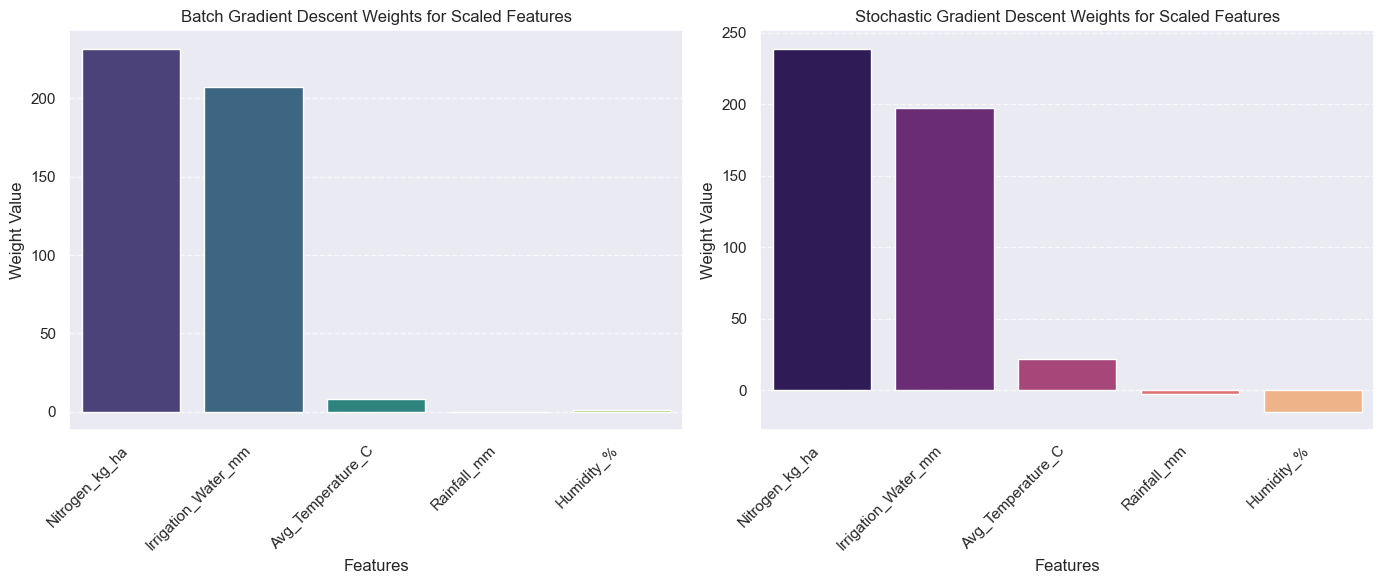

In [82]:
input_features = ['Nitrogen_kg_ha', 'Irrigation_Water_mm', 'Avg_Temperature_C', 'Rainfall_mm', 'Humidity_%']

plt.figure(figsize=(14, 6))

# Plot for Batch Gradient Descent Weights
plt.subplot(1, 2, 1)
sns.barplot(x=input_features, y=batch_gd_weights, palette='viridis')
plt.title('Batch Gradient Descent Weights for Scaled Features')
plt.xlabel('Features')
plt.ylabel('Weight Value')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Stochastic Gradient Descent Weights
plt.subplot(1, 2, 2)
sns.barplot(x=input_features, y=sgd_weights, palette='magma')
plt.title('Stochastic Gradient Descent Weights for Scaled Features')
plt.xlabel('Features')
plt.ylabel('Weight Value')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

To understand the influence of each variable, we look at the learned weights from the linear regression model, keeping in mind that these apply to the scaled input features. The larger the absolute value of a weight, the stronger its influence.

Nitrogen_kg_ha : This is the most influential factor. An increase in nitrogen fertilizer application directly leads to a significant increase in GHG emissions. This is expected, as nitrogen fertilizers are a primary source of N2O, a potent greenhouse gas.

Irrigation_Water_mm : The amount of irrigation water also has a strong positive impact. While less pronounced than nitrogen, more irrigation is associated with higher emissions. This could be due to energy consumption for irrigation or specific soil conditions created by water leading to increased CH4 or N2O.

Other variables like Avg_Temperature_C and Rainfall_mm have a positive but much weaker influence. Humidity_% shows a slight negative influence, meaning higher humidity is weakly associated with slightly lower emissions, though this effect is minor compared to nitrogen and irrigation.

In summary, controlling Nitrogen_kg_ha and Irrigation_Water_mm would likely be the most effective strategies for reducing Total GHG emissions based on this model.

# **Polynomial Regression and Regularization**
1. Apply polynomial features of degree two.
2. Train polynomial regression models with:
    * L1 regularization
    * L2 regularization
3. Evaluate and compare results with linear regression.
4. Summarize the performance differences and the effects of model complexity.
5. Visualize the results

### Applying polynomial features of degree two

In [114]:
def polynomial_features(X):
    n_samples, n_features = X.shape

    poly = X.copy()

    for i in range(n_features):
        for j in range(i, n_features):
            new_feature = (X[:,i] * X[:,j]).reshape(-1,1)
            poly = np.hstack((poly, new_feature))

    # Adding bias column
    bias = np.ones((n_samples, 1))
    poly = np.hstack((bias, poly))

    return poly

In [115]:
X_train_poly = polynomial_features(X_train_scaled)
X_test_poly = polynomial_features(X_test_scaled)

theta = np.zeros((X_train_poly.shape[1], 1))

### L2 Regularization

In [116]:
def l2_reg(X, y, theta, _lambda):
    m = len(y)
    predictions = X @ theta

    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)

    reg = (_lambda/(2 * m)) * np.sum(theta[1:] ** 2)

    return cost + reg

### L1 Regularization

In [117]:
def l1_reg(X, y, theta, _lambda):
    m = len(y)
    predictions = X @ theta

    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)

    reg = (_lambda/ m) * np.sum(np.abs(theta[1:]))

    return cost + reg

## Gradient Descent

### L2 (Ridge)

In [118]:
def gradient_descent_l2(X, y, theta, lr, iterations, _lambda):
    m = len(y)

    cost_history = []

    for i in range(iterations):
        predictions = X @ theta
        error = predictions - y

        gradient = (1/m) * (X.T @ error)

        # regularization (skip bias)
        gradient[1:] += (_lambda/m) * theta[1:]

        theta = theta - lr * gradient

        cost = l2_reg(X, y, theta, _lambda)

        cost_history.append(cost)

    return theta, cost_history

### L1 (Lasso)

In [119]:
def gradient_descent_l1(X, y, theta, lr, iterations, _lambda):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X @ theta
        error = predictions - y

        gradient = (1/m) * (X.T @ error)

        gradient[1:] += (_lambda/m) * np.sign(theta[1:])

        theta = theta - lr * gradient

        cost = l1_reg(X, y, theta, _lambda)

        cost_history.append(cost)

    return theta, cost_history

## Train Models

In [172]:
lr = 1e-2
iterations = 3000
_lambda = 15

### Train L2

In [173]:
theta_l2, cost_l2 = gradient_descent_l2(
    X_train_poly,
    y_train.values.reshape(-1, 1),
    theta,
    lr,
    iterations,
    _lambda
)

### Train L1

In [174]:
theta_l1, cost_l1 = gradient_descent_l1(
    X_train_poly,
    y_train.values.reshape(-1, 1),
    theta,
    lr,
    iterations,
    _lambda
)

## Predictions

In [175]:
pred_l2 = X_test_poly @ theta_l2
pred_l1 = X_test_poly @ theta_l1

## Results

In [176]:
y_test_poly = y_test.values.reshape(-1, 1)

In [177]:
print("L2 Regularization")
print("MAE:", mae(y_test_poly, pred_l2))
print("MSE:", mse(y_test_poly, pred_l2))
print("R2:", r2_score(y_test_poly, pred_l2))


print("\nL1 Regularization")
print("MAE:", mae(y_test_poly, pred_l1))
print("MSE:", mse(y_test_poly, pred_l1))
print("R2:", r2_score(y_test_poly, pred_l1))

L2 Regularization
MAE: 92.80753934728757
MSE: 14659.172759569461
R2: 0.8777328629606959

L1 Regularization
MAE: 92.80618568252042
MSE: 14658.868148997468
R2: 0.8777354036131024


## Visualization

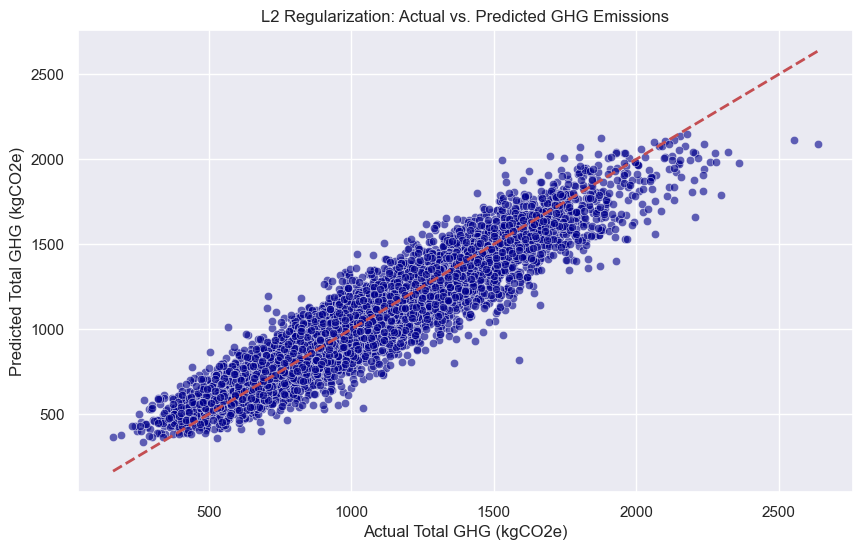

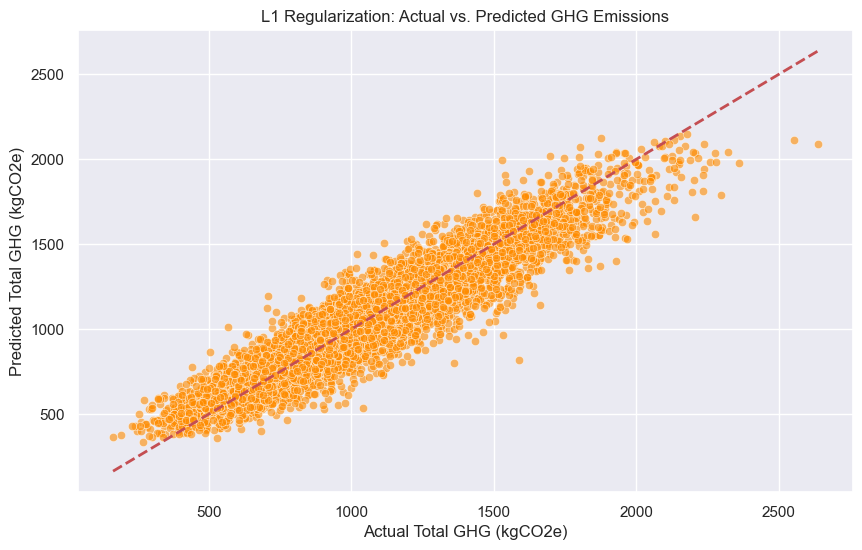

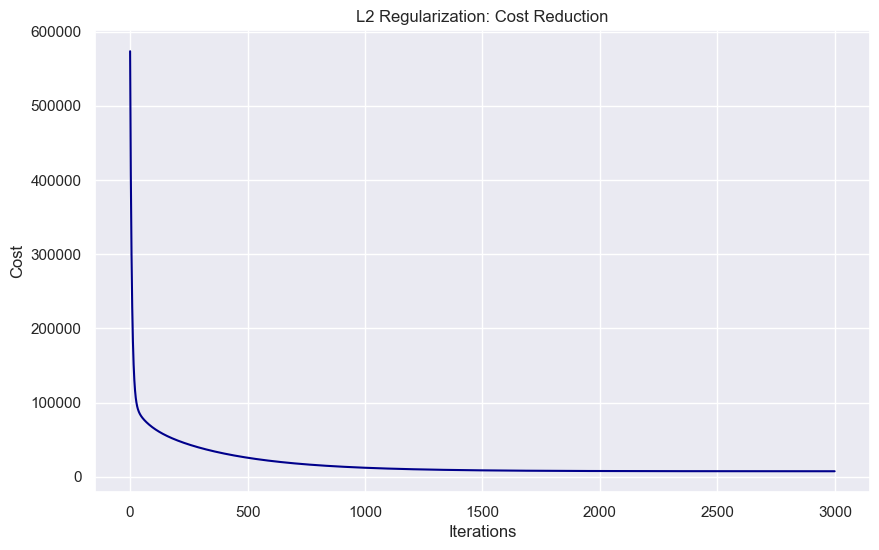

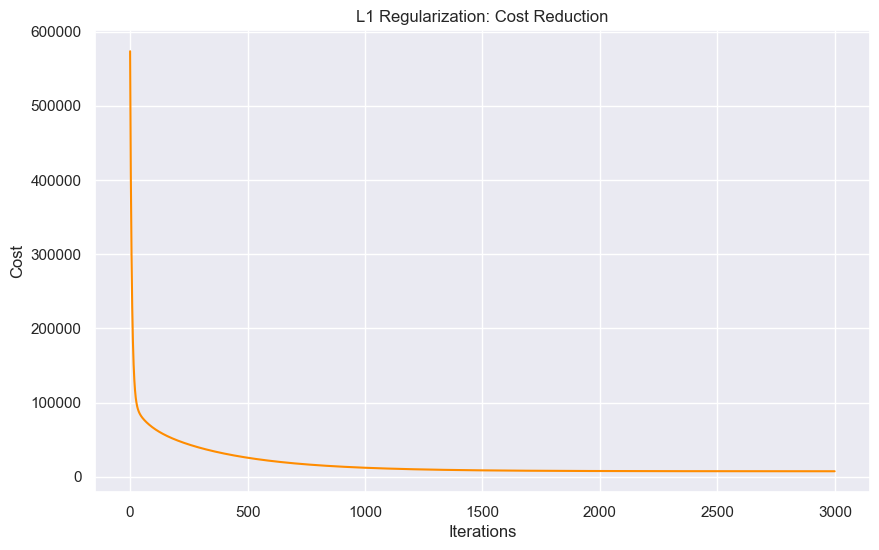

In [180]:
# L2 Predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=pred_l2.flatten(), alpha=0.6, color='darkblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Total GHG (kgCO2e)')
plt.ylabel('Predicted Total GHG (kgCO2e)')
plt.title('L2 Regularization: Actual vs. Predicted GHG Emissions')
plt.grid(True)
plt.show()

# L1 Predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=pred_l1.flatten(), alpha=0.6, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Total GHG (kgCO2e)')
plt.ylabel('Predicted Total GHG (kgCO2e)')
plt.title('L1 Regularization: Actual vs. Predicted GHG Emissions')
plt.grid(True)
plt.show()

# L2 Cost
plt.figure(figsize=(10, 6))
plt.plot([float(c) for c in cost_l2], color='darkblue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('L2 Regularization: Cost Reduction')
plt.grid(True)
plt.show()

# L1 Cost
plt.figure(figsize=(10, 6))
plt.plot([float(c) for c in cost_l1], color='darkorange')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('L1 Regularization: Cost Reduction')
plt.grid(True)
plt.show()

# **Classification Reformulation**
1. Convert the regression task into a classification problem by defining a clear, well-justified labeling strategy (e.g., low/medium/high emissions).
2. Apply a linear classifier:
    * Logistic Regression
    * Naive Bayes
    * Perceptron
3. Present results and discuss the suitability and limitations of the classification approach.
4. Visualize the results

# **Summary**